In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from seaborn import scatterplot
from pandas import read_csv
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer

from numpy import nan 
%matplotlib inline

In [12]:
raw_data=read_csv('train2.csv') #csv połączone test.csv+train.csv(bez rekordow gdzie w calym wierszu brakuje danych)
dataset=raw_data.copy()


In [46]:
#łatwe sprawdzenie zmiennych kategorycznych jakie sa
table=pd.pivot_table(dataset, values='quantity', index=['city', 'shop', 'brand'], columns='container',  aggfunc=np.sum)
print(table)


container         1.000000   2.000000  2.000663   3.000000
city shop brand                                           
1    1    1      1444503.0  1223285.0   22445.0   991919.0
          2      2412975.0  1958280.0       NaN  1470806.0
          3      3346719.0  2866866.0       NaN  1967282.0
          4      3695423.0  3328727.0       NaN  2550819.0
          5      2211974.0  1695436.0   44592.0  1310114.0
     3    1      1232419.0   983820.0       NaN   725387.0
          2      2020647.0  1508007.0   11677.0  1200949.0
          3      2596876.0  2222582.0   23044.0  1680637.0
          4      3065998.0  2603741.0       NaN  1950457.0
          5      1672984.0  1465548.0       NaN  1086107.0
2    2    1      1800880.0  1488963.0       NaN  1152359.0
          2      2832269.0  2372737.0       NaN  1772191.0
          3      3831913.0  3264253.0  154315.0  2346843.0
          4      4722009.0  3986752.0       NaN  2999514.0
          5      2582790.0  2160293.0       NaN  1645966

In [14]:
#organizacja zmiennych jakosciowych-> zamiast nazw sa liczby
city_map={'Athens':1,'Irakleion':2,'Larisa':3,'Patra':4, 'Thessaloniki':5 }
shop_map={'shop_1':1, 'shop_2':2, 'shop_3':3,'shop_4':4, 'shop_5':5,'shop_6':6}
brand_map={'kinder-cola':1, 'adult-cola':2, 'orange-power':3, 'gazoza':4,'lemon-boost':5}
container_map={'can':1, 'glass':2,'plastic':3}
dataset['city']=dataset['city'].map(city_map)
dataset['shop']=dataset['shop'].map(shop_map)
dataset['brand']=dataset['brand'].map(brand_map)
dataset['container']=dataset['container'].map(container_map)

In [108]:
#brakujace dane i uzupelnianie
print(dataset.isnull().sum()) # do sprawdzenia gdzie brakuje danych

#wypelnienie brkaujacych danych
dataset.fillna(dataset.mean(), inplace=True)
dataset.fillna(dataset['capacity'].mode()[0], inplace=True)
print(dataset.isnull().sum())


id           0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64
id           0
city         0
lat          0
long         0
pop          0
shop         0
brand        0
container    0
capacity     0
price        0
quantity     0
dtype: int64


               id         city          lat         long            pop  \
count  7560.00000  7560.000000  7560.000000  7560.000000    7560.000000   
mean   3779.50000     2.666667    38.300808    23.270191  355174.095238   
std    2182.52835     1.490811     1.644049     1.082924  232441.012350   
min       0.00000     1.000000    35.327870    21.734440  134219.000000   
25%    1889.75000     1.000000    37.962450    22.417610  141732.000000   
50%    3779.50000     2.500000    38.244440    23.270191  257501.500000   
75%    5669.25000     4.000000    39.636890    23.716220  665102.000000   
max    7559.00000     5.000000    40.643610    25.143410  672130.000000   

              shop        brand    container        price       quantity  
count  7560.000000  7560.000000  7560.000000  7560.000000    7560.000000  
mean      3.500000     3.000000     2.000663     1.196049   29421.715212  
std       1.707938     1.414307     0.815659     0.816838   17665.033867  
min       1.000000     1

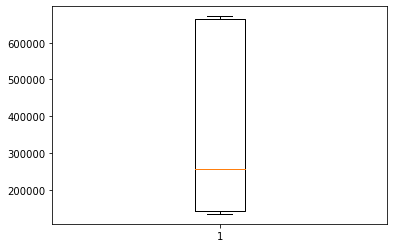

price


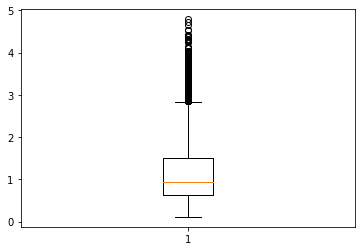

quantity


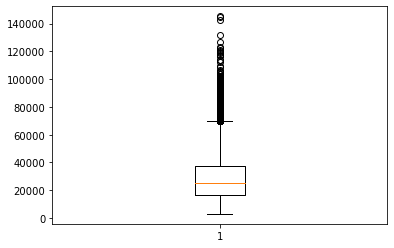

In [47]:

print(dataset.describe()) #opis statystyczny danych :)
print("")
#DIAGRAMY
#wykresy wasy-box 
#kolumny numeryczne lat long pop capacity price quantity
dataset.columns
print('pop')
plt.boxplot(dataset['pop'])
plt.show()
print('price')
plt.boxplot(dataset['price'])
plt.show()
print('quantity')
plt.boxplot(dataset['quantity'])
plt.show()

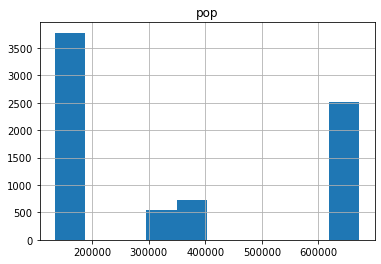

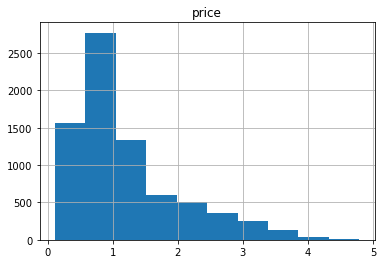

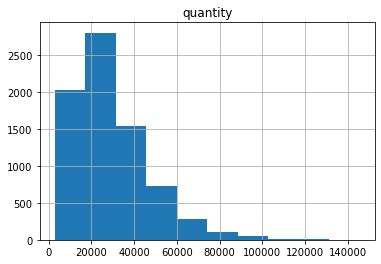

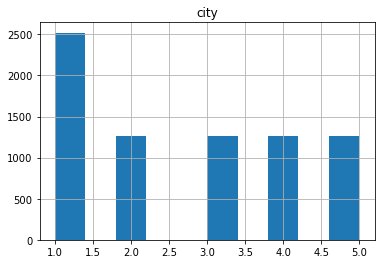

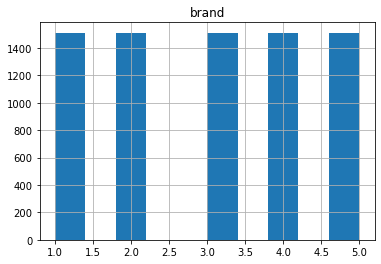

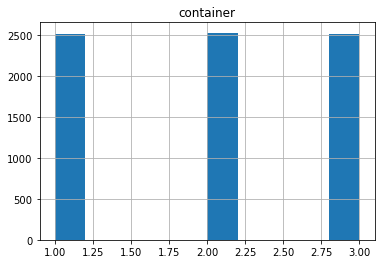

In [48]:
#histogramy (lat-> latitude , long-> longitude)
dataset.hist('pop')
plt.show()
dataset.hist('price')
plt.show()
dataset.hist('quantity')
plt.show()
dataset.hist('city')
plt.show()
dataset.hist('brand')
plt.show()
dataset.hist('container')
plt.show()
#przy container,brand, city konkretne wartosci typu 1 ,2 oznaczaja miasta/rodzaj opakowania/marke


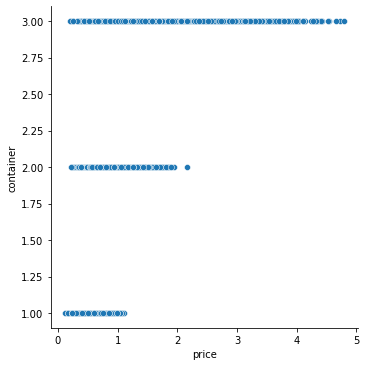

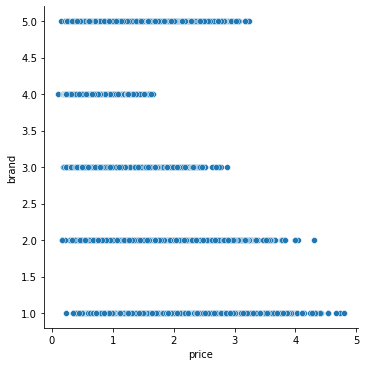

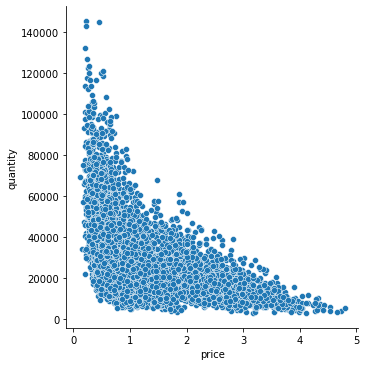

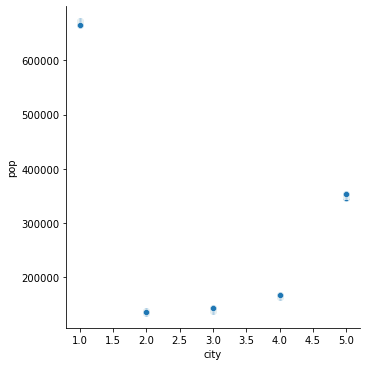

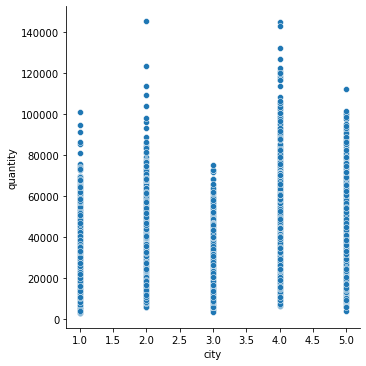

In [106]:
#diffrent one
sns.relplot(x=dataset['price'], y=dataset['container'])
sns.relplot(x=dataset['price'], y=dataset['brand'])
sns.relplot(x=dataset['price'], y=dataset['quantity']) #zaleznosc cena ilosc
#sns.relplot(x=dataset['date'], y=dataset['quantity']) 
sns.relplot(x=dataset['city'], y=dataset['pop']) 
sns.relplot(x=dataset['city'], y=dataset['quantity']) 


In [119]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#podzial danych  na train i test
#Target Variable = "quantity"
X =   dataset.iloc[:, :-1].values  #wszystkie kolumny poza osttania
Y = dataset.iloc[:, -1].values  #ostatnia kolumna



In [120]:
#przepis na model XD
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2 )
#regression = LinearRegression()
#regression.fit(X_train, Y_train)
#prediction = regression.predict(X_test)
#regression.score(X_test,Y_test)
#accuracy??